# Web Scraping for future Data Scientists

A l’època en que l’aprenentatge automàtic i el *big data* poden crear o enfonsar una empresa, hi ha un recurs més valuós que qualsevol altre: **les dades**.

Malauradament, és difícil aconseguir les dades contextualitzades i estructurades que sovint necessiten les empreses.

Però hi ha una solució: **web scraping**.

Web scraping és l’API universal, que permet utilitzar les dades disponibles públicament per als vostres interesos.

## Què és l'*Scraping*?

*Web scraping* és el procés d’extracció de dades d’un lloc web.

Si alguna vegada heu copiat informació d'un lloc web i l'heu enganxat en un full de càlcul d'Excel o en un document de Word, tècnicament esteu fent *scraping*.

Haver de copiar i enganxar repetidament dades d’un lloc web a un full de càlcul d’Excel és avorrit. Fer *scraping* automatitzat tot el procés, fent que sigui més "fàcil" i ràpid.

## Per a què es pot fer servir el *web scraping*?

Un extractor de dades en mans d’un desenvolupador experimentat i imaginatiu és una eina única.

Podeu programar una API per automatitzar tota mena d’escenaris. Qualsevol contingut que vegeu a una pàgina web es pot extreure si teniu prou recursos. 

Un cop tingueu les dades, podreu utilitzar-les a les vostres aplicacions per proporcionar un avantatge al vostre negoci, per controlar la vostra reputació en línia o simplement per simplificar la vostra vida.

Avui en dia, l'*scapring* s’utilitza en tot, comerç electrònic, llocs web de comparació de preus, generació de contactes o agregació de contingut.

Amb el progrés en l'aprenentatge automàtic i la intel·ligència artificial, l'extracció de dades web ha guanyat importància. 

Aquestes APIs són úniques, ja que poden proporcionar algunes de les dades més importants per classificar i crear algoritmes predictius.


## El teu primer *Scraping*

Per tal de poder executar tot el codi d'aquest notebook, és necessari que instal·leu les següents llibreries:

````python
#Beautiful Soup is a library that makes it easy to scrape information from web pages
!pip install beautifulsoup4 or !pip3 install beautifulsoup4

#Requests is an elegant and simple HTTP library for Python
!pip install requests or !pip3 install requests

# GeoPandas is an open source project to make working with geospatial data in python easier
!pip install geopandas or !pip3 install geopandas

# contextily is a small Python 3 package to retrieve tile maps from the internet
!pip install contextily or !pip3 install contextily

# The descartes library provides a nicer integration of Shapely geometry objects with Matplotlib.
!pip install descartes or !pip3 install descartes

````

In [1]:
#!pip install beautifulsoup4
#!pip install requests
#!pip3 install lxml

In [2]:
from bs4 import BeautifulSoup 
import pandas as pd
import numpy as np 
import requests
from tqdm.notebook import tqdm

In [3]:
url = 'https://tnui-ub.github.io/scraping/'

Per entendre com funciona farem *scraping* de la següent web:

<img src="images/github.png" width="500"/>

## 1. Fer una còpia de la web:

Per tal de fer *scraping* sobre la web *url*, cal **fer una còpia** d'aquesta. 

Però, què cal copiar? Què és realment una web?

(Botó dret *inspeccionar*)

<img src="images/inspeccionar.png" width="500"/>

In [4]:
def get_page(url):
    """
    Retorna un objecte Soup amb la web que s'ha passat pel parametre url
    """
        
    # Guardem la pagina i la guardem en la variable content
    query = requests.get(url = url, 
                        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.163 Safari/537.36'
        })
    content = query.content

    #Beautiful Soup is an HTML/XML parser for Python that can turn even invalid markup into a parse tree
    page = BeautifulSoup(content, features='lxml')
    return page

page = get_page(url)

Us convido a comparar les variables *content* i *page*.

## 2. Buscar informació dintre de la web:

El següent pas és trobar aquella informació que ens interessa.

Per assolir aquest objectiu farem servir la funció *find* de l'objecte *BeautifulSoup*.

En el primer exemple voldrem copiar el títol... però com ho fem?

<img src="images/title.png" width="900"/>

In [5]:
# Títol de la pàgina web
page.find('h1').text

'My first web scraping'

Compliquem una mica la informació que volem agafar...

Ara volem agafar el títol de l'assignatura (lateral esquerra).

<img src="images/subject.png" width="900"/>

In [6]:
# Titol de l'assignatura
page.find('div', {'class':'side'}).find('h2').text

'Taller de Nous Usos de la Informàtica (2020-2021)'

Ara ja sabem com buscar elements en diferents parts de la pàgina web.

Però per poder fer cerques automàtiques, ens cal saber trobar els nous enllaços.

En la següent cel·la agafarem tots els hipervincles (enllaços a altres pàgines) i el nom que tenen assignats.

Recordatori de les etiquetes bàsiques: https://es.wikipedia.org/wiki/HTML#Etiquetas_HTML_b%C3%A1sicas

In [7]:
# Enllaços i noms
[(elem.text, elem['href']) for elem in page.find_all('a')]

[('Home', 'https://tnui-ub.github.io/scraping/'),
 ('CampusVirtual', 'https://campusvirtual.ub.edu/'),
 ('GitHub', 'https://github.com/TNUI-UB'),
 ('Google', 'https://www.google.es/')]

## Let's code! 

Aneu veient com funciona? Fàcil?

Anem a veure què sou capaços de fer!

1. Títols amb les entrades del blog.
2. Títol i contingut de l'entrada
3. Peu de pàgina

In [8]:
# Títols de les entrades al blog
[elem.text for elem in page.find('div', {'class':'main'}).find_all('h2')]

['Wednesday class', 'Thursday class']

In [9]:
# Títol i contingut de cada entrada
[(title.text, description.text)
 for title, description in zip(page.find('div', {'class':'main'}).find_all('h2'), page.find('div', {'class':'main'}).find_all('p'))]

[('Wednesday class',
  'Web scraping, web harvesting, or web data extraction is data scraping used for extracting data from websites. Web scraping software may access the World Wide Web directly using the Hypertext Transfer Protocol, or through a web browser. While web scraping can be done manually by a software user, the term typically refers to automated processes implemented using a bot or web crawler. It is a form of copying, in which specific data is gathered and copied from the web, typically into a central local database or spreadsheet, for later retrieval or analysis.'),
 ('Thursday class',
  'There are methods that some websites use to prevent web scraping, such as detecting and disallowing bots from crawling (viewing) their pages. In response, there are web scraping systems that rely on using techniques in DOM parsing, computer vision and natural language processing to simulate human browsing to enable gathering web page content for offline parsing.')]

In [10]:
# Are you an expert?
page.find('div', {'class': 'footer'}).find('h2').text

'Now you are an expert!'

Ara que ja sabem fer *scraping* en una web... podem extreure informació d'interès? 

A qui no li agrada viatjar?


# Booking.com

*Booking.com is a Dutch online travel agency for lodging reservations & other travel products, and a subsidiary of Booking Holdings. It is headquartered in Amsterdam.
The website has over 28 million listings. The site is available in 43 languages.*

Suposem que ja tenim un destí, **Barcelona**, els dies que volem anar, de **2021-12-01 a 2021-12-10** i quantes persones, **6**. 

In [11]:
people = 6
data_in = '2021-12-01'
data_out = '2021-12-10'

booking_url = 'https://www.booking.com/searchresults.es.html?aid=397594&label=gog235jc-1DCAEoggI46AdIClgDaEaIAQGYAQq4AQfIAQzYAQPoAQH4AQKIAgGoAgO4AvWB1YwGwAIB0gIkNjE1ODE0Y2UtN2M2Zi00NGM2LTgyMWEtY2Y0OTM1YjUwMmJj2AIE4AIB&sid=eada29e1d99d631d99ecc8f3e8bd546e&sb=1&sb_lp=1&src=index&src_elem=sb&error_url=https%3A%2F%2Fwww.booking.com%2Findex.es.html%3Faid%3D397594%3Blabel%3Dgog235jc-1DCAEoggI46AdIClgDaEaIAQGYAQq4AQfIAQzYAQPoAQH4AQKIAgGoAgO4AvWB1YwGwAIB0gIkNjE1ODE0Y2UtN2M2Zi00NGM2LTgyMWEtY2Y0OTM1YjUwMmJj2AIE4AIB%3Bsid%3Deada29e1d99d631d99ecc8f3e8bd546e%3Bsb_price_type%3Dtotal%3Bsig%3Dv11rpTZb9P%26%3B&ss=Barcelona%2C+Espa%C3%B1a&is_ski_area=&checkin_year=2021&checkin_month=12&checkin_monthday=1&checkout_year=2021&checkout_month=12&checkout_monthday=10&group_adults=6&group_children=0&no_rooms=1&b_h4u_keep_filters=&from_sf=1&dest_id=-372490&dest_type=city&search_pageview_id=dba57d7a87890086&search_selected=true'

<img src="images/booking.png"/>

Abans hem vist com agafar una web.

Els passos que ens cal implementar a continuació són:

1. Obtenir la informació d'un apartament.
2. Obtenir tots els apartaments d'una pàgina.
3. Obtenir totes les pàgines on hi ha apartaments.

In [12]:
page = get_page(booking_url)

És important saber què volem i on està per trobar la seva localització a la web.

<img src="images/booking-inspeccionar.png" width="1100"/>

In [13]:
def get_next_apartment(page):
    """
    Generador on cada element que torna és la informació d'un apartament
    """
    query = page.findAll("div", {"class": "_5d6c618c8"})

    for q in query:
        d = {
            'name': q.find("div", {"class": 'fde444d7ef _c445487e2'}).text,
            'links' : q.find("a")["href"],
            'description': q.find("div", {"class": '_371410fad'}).find('div', {'class':"_4abc4c3d5"}).text,
            'roominfos': [_q.text for _q in q.find("div", {"class": '_371410fad'}).findAll('span', {'class': 'f3700bb6ca'})],
            'prices' : q.find('span', {'class': "fde444d7ef _e885fdc12"}).text.replace('\xa0', ' '),
        }
        
        try:
            d.update({
                'ratings' : q.find('div', {'class': "_9c5f726ff bd528f9ea6"}).text,
                'text_rating': q.find('div', {'class': "_9c5f726ff _192b3a196 _fb3ba087b f1cbb919ef"}).text,
                'reviews' : q.find('div', {'class': "_4abc4c3d5 _1e6021d2f _fb3ba087b _6e869d6e0"}).text,
            })
        except AttributeError:
            # This can happen if any of these divs doesn't exist, 
            # as find returns None and None has no attribute text.
            # This is possible if the apartment is new to the page.
            # If that happens, do not include these fields, they'll become NaN in the DataFrame.
            pass
        
        yield d

In [14]:
pd.DataFrame(get_next_apartment(page))

name  \
0                            Click&Flat Seneca Suites   
1                                 Arago312 Apartments   
2                                         Casa Gracia   
3                                 Generator Barcelona   
4                  Sant Jordi Hostels Sagrada Familia   
5                                TOC Hostel Barcelona   
6                       Signature Apartments Diagonal   
7                                 Charmsuites Paralel   
8                  BarcelonaForRent The Central Place   
9    Eric Vökel Boutique Apartments - Gran Vía Suites   
10               Feelathome Poblenou Beach Apartments   
11                                      Lugaris Beach   
12                               Hotel Arts Barcelona   
13                         Sensation Authentic Gràcia   
14                              Apartments Ramblas108   
15                                 Midtown Apartments   
16                               Sweet Inn - Rocafort   
17                                 Ramblas Apartments   
18                    BCN Rambla Catalunya Apartments   
19                  Friendly Rentals Ramblas Boqueria   
20  Cosmo Apartments Consell de Cent - Plaza Unive...   
21                       Fewdays Barcelona Apartments   
22                Weflating Suites Sant Antoni Market   
23             Bcn Paseo De Gracia Rocamora Apartment   
24                                 Weflating Eixample   

                                                links  \
0   https://www.booking.com/hotel/es/click-amp-fla...   
1   https://www.booking.com/hotel/es/araga3312-apa...   
2   https://www.booking.com/hotel/es/hostel-casa-g...   
3   https://www.booking.com/hotel/es/generator-hos...   
4   https://www.booking.com/hotel/es/sant-jordi-sa...   
5   https://www.booking.com/hotel/es/toc-hostel-ba...   
6   https://www.booking.com/hotel/es/signature-apa...   
7   https://www.booking.com/hotel/es/charmsuites-c...   
8   https://www.booking.com/hotel/es/barcelonaforr...   
9   https://www.booking.com/hotel/es/eric-vokel-gr...   
10  https://www.booking.com/hotel/es/feelathome-po...   
11  https://www.booking.com/hotel/es/lugaris-sea-t...   
12  https://www.booking.com/hotel/es/arts-barcelon...   
13  https://www.booking.com/hotel/es/sensation-aut...   
14  https://www.booking.com/hotel/es/apart-ramblas...   
15  https://www.booking.com/hotel/es/midtown-apart...   
16  https://www.booking.com/hotel/es/sweet-inn-apa...   
17  https://www.booking.com/hotel/es/ramblas-apart...   
18  https://www.booking.com/hotel/es/bcn-rambla-ca...   
19  https://www.booking.com/hotel/es/ramblas-marke...   
20  https://www.booking.com/hotel/es/angla-boutiqu...   
21  https://www.booking.com/hotel/es/fewdaysbarcel...   
22  https://www.booking.com/hotel/es/weflating-sui...   
23  https://www.booking.com/hotel/es/bcn-paseo-de-...   
24  https://www.booking.com/hotel/es/dailyflats-vi...   

                                          description  \
0     Apartamento de 2 dormitorios - Planta baja - NY   
1   Apartamento de 3 dormitorios (6 adultos) - Ara...   
2                    Habitación Familiar (6 adultos)    
3                                      Suite Superior   
4              Habitación Compartida Mixta de 8 camas   
5                    Habitación Familiar (6 adultos)    
6                           Apartamento - Planta baja   
7            Apartamento de 2 dormitorios con terraza   
8    Apartamento Superior con 2 dormitorios, balcó...   
9            Apartamento de 2 dormitorios (6 adultos)   
10          Apartamento de 2 dormitorios - Bilbao, 11   
11                   Apartamento Familiar (6 adultos)   
12  Suite Penthouse de 3 dormitorios con vistas al...   
13                       Apartamento de 2 dormitorios   
14  Apartamento de 2 dormitorios (4-6 adultos) - Á...   
15           Apartamento de 2 dormitorios (6 adultos)   
16                       Apartamento de 3 dormitorios   
17                       Apartamento de 2 dormitorios   


Ara tenim un dataframe amb els apartaments d'una pàgina, però encara ens queden la resta de resultats.

In [15]:
def get_next_page(page):
    """
    Donat un objecte Soup, retorna la següent pàgina
    """
    
    # Exercici pel lector
    mostrando = page.find('span', {'class': '_919e6c5ab'}).text
    
    import re
    match = re.fullmatch(r'Mostrando ([0-9]+) - ([0-9]+)', mostrando)
    assert match is not None
    start, end = map(int, match.groups())
    
    encontrados = page.find('div', {'class': '_111b4b398'}).text
    
    match = re.fullmatch(r'.+? ([0-9]+) alojamientos encontrados', encontrados)
    assert match is not None
    total, = map(int, match.groups())
    
    if end >= total:
        return None
    else:
        new_url = booking_url + f'&offset={end}'
        return get_page(new_url)

In [16]:
def get_all_apartments(url):
    try:
        page = get_page(url)

        while page is not None:
            yield from get_next_apartment(page)
            page = get_next_page(page)
    except KeyboardInterrupt:
        pass # stop iterable
        
df = pd.DataFrame(get_all_apartments(booking_url))

In [17]:
df.head(5)

name  \
0                 Arago312 Apartments   
1                         Casa Gracia   
2                 Generator Barcelona   
3  Sant Jordi Hostels Sagrada Familia   
4                TOC Hostel Barcelona   

                                               links  \
0  https://www.booking.com/hotel/es/araga3312-apa...   
1  https://www.booking.com/hotel/es/hostel-casa-g...   
2  https://www.booking.com/hotel/es/generator-hos...   
3  https://www.booking.com/hotel/es/sant-jordi-sa...   
4  https://www.booking.com/hotel/es/toc-hostel-ba...   

                                         description  \
0  Apartamento de 3 dormitorios (6 adultos) - Ara...   
1                   Habitación Familiar (6 adultos)    
2                                     Suite Superior   
3             Habitación Compartida Mixta de 8 camas   
4                   Habitación Familiar (6 adultos)    

                                           roominfos   prices ratings  \
0  [Apartamento entero, 3 dormitorios, 2 baños, 9...  € 2.552     9,0   
1                                                 []  € 1.433     8,3   
2  [Suite privada, 1 dormitorio, 1 sala de estar,...  € 1.904     8,1   
3                            [Habitación compartida]  € 1.136     8,5   
4                                                 []  € 1.949     8,8   

  text_rating            reviews  
0  Fantástico    598 comentarios  
1    Muy bien  3.288 comentarios  
2    Muy bien  3.508 comentarios  
3    Muy bien  1.597 comentarios  
4    Fabuloso  2.916 comentarios

In [18]:
df.shape

(653, 8)

Però podem utilitzar les dades tal com estan?

Tal com llegim les dades estan desendreçades, sense netejar i no es poden aplicar a cap algorisme directament (necessitem dades categòriques o valors).

Per aquest motiu, normalment el procés de fer *scraping* va seguit amb la neteja de dades. 

Aquest post-procesament el veureu a la pràctica 3.

# Visualització de les dades extretes

In [19]:
# GeoPandas is an open source project to make working with geospatial data in python easier
!pip install geopandas
# contextily is a small Python 3 package to retrieve tile maps from the internet
!pip install contextily
# The descartes library provides a nicer integration of Shapely geometry objects with Matplotlib.
!pip install descartes

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import geopandas as gpd
import contextily as ctx

# Airbnb

*Airbnb allows people to rent out their properties on the platform of Airbnb. Travelers can then book these properties for shorter or longer periods of time. The company was founded in August 2008 in San Francisco, California, and currently has an annual revenue stream of over 2.5 Billion US Dollars [1]. In the US alone the platform has 660,000 listings [2]. Every individual listing contains a lot of information like the facilities offered, the location, information about the host, and reviews.*

## Exploració de les dades

Com hem dit al llarg del curs, quan treballem amb dades, és molt important fer un anàlisis superficial per entendre que tenim.

Però de moment ja sabeu com fer *scraping* i anem a veure algunes visualitzacions amb les dades extretes.

In [21]:
df = pd.read_csv('data/clean_scraping.csv', index_col = 'Unnamed: 0')
df.shape

(23626, 16)

In [22]:
df.head()

id                                             name  host_id  \
0  18666                          Flat with Sunny Terrace    71615   
1  18674  Huge flat for 8 people close to Sagrada Familia    71615   
2  19157              Great Place in Sagrada Familia, Bcn    73099   
3  20345              2 Double rooms for 4 persons, WI-FI    76809   
4  21974               Comf. double room/private bathroom    73163   

          host_name neighbourhood_group                  neighbourhood  \
0  Mireia And Maria          Sant Martí     el Camp de l'Arpa del Clot   
1  Mireia And Maria            Eixample             la Sagrada Família   
2            Urania            Eixample             la Sagrada Família   
3              Mila          Nou Barris  Vilapicina i la Torre Llobeta   
4            Andres        Ciutat Vella                 el Barri Gòtic   

    latitude  longitude        room_type  price  minimum_nights  \
0  41.408886   2.185545  Entire home/apt    130               3   
1  41.404197   2.173058  Entire home/apt    110               1   
2  41.407929   2.174540     Private room     30               2   
3  41.429497   2.181558     Private room     25               2   
4  41.380768   2.175510     Private room     60               3   

   number_of_reviews last_review  reviews_per_month  \
0                  1  2015-10-10               0.03   
1                  4  2016-06-20               0.07   
2                160  2018-05-18               1.68   
3                 71  2018-05-03               0.73   
4                  2  2017-11-06               0.15   

   calculated_host_listings_count  availability_365  
0                              29                61  
1                              29               148  
2                               2                69  
3                               1               335  
4                               2                 0

A diferència dels dataframes que hem creat, tenim les dades de forma categòrica, les quals es poden utilitzar per treballar.

In [23]:
def count_column(df, column):
    """
    Funció que ens permet visualitzar les columnes categòriques
    """
    return df.groupby([column]).size()

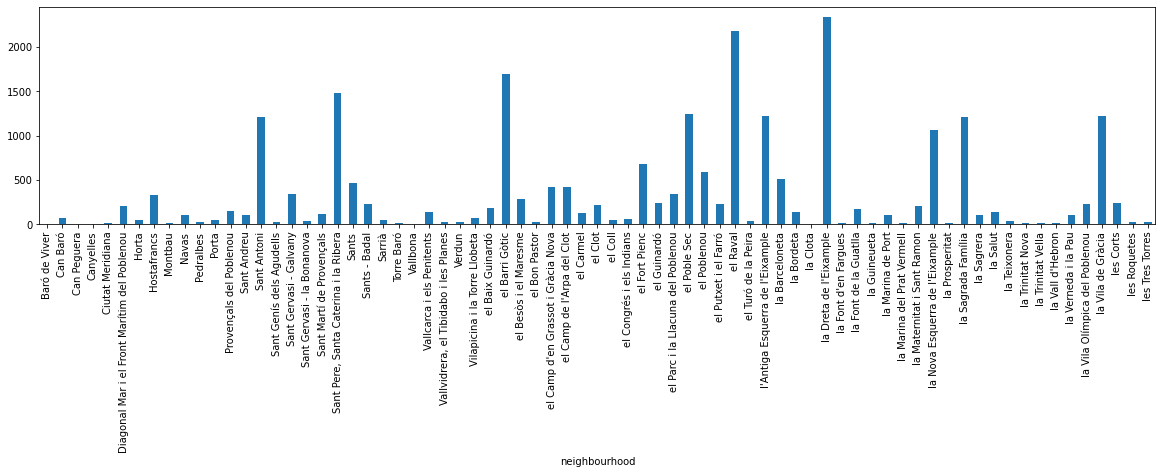

In [24]:
# Barris de Barcelona i la quantitat d'apartaments, hotels, habitacions disponibles

plt.figure(figsize = (20, 4))
count_column(df, 'neighbourhood').plot.bar()
plt.show()

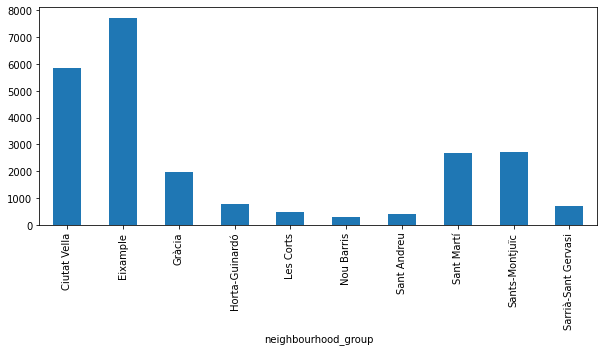

In [25]:
# Districtes de Barcelona i la quantitat d'apartaments, hotels, habitacions disponibles.
plt.figure(figsize = (10, 4))
count_column(df, 'neighbourhood_group').plot.bar()
plt.show()

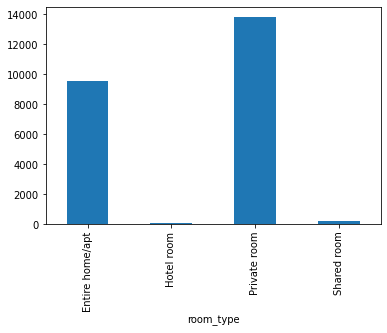

In [26]:
# Tipus de lloguers (Apartament, hotel, habitació)
count_column(df, 'room_type').plot.bar()
plt.show()

## Visualitzacions geogràfiques

Les visualitzacions que mostrarem a continuació estan relacionades amb la geoposició dels lloguers.

Per tal de dur a terme aquestes visualitzacions necessitem tenir un mapa de Barcelona.

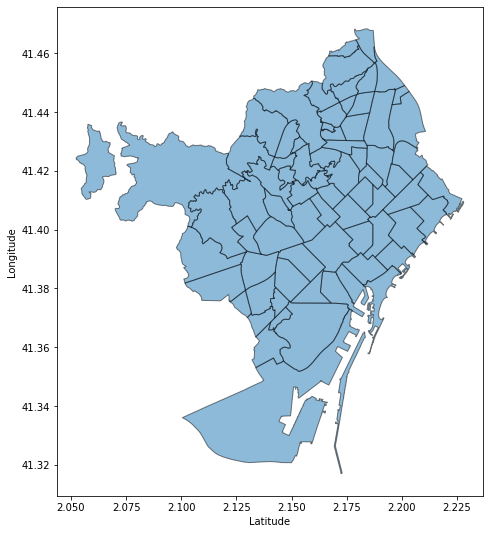

In [27]:
# Informació geogràfica dels barris de Barcelona 
barris = gpd.read_file("data/barris.geojson")

barris.plot(figsize=(9, 9), alpha=0.5, edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

Per tenir una idea de la distribució que segueixen, anem a visualitzar la localització de cada lloguer sobre el mapa de Barcelona.

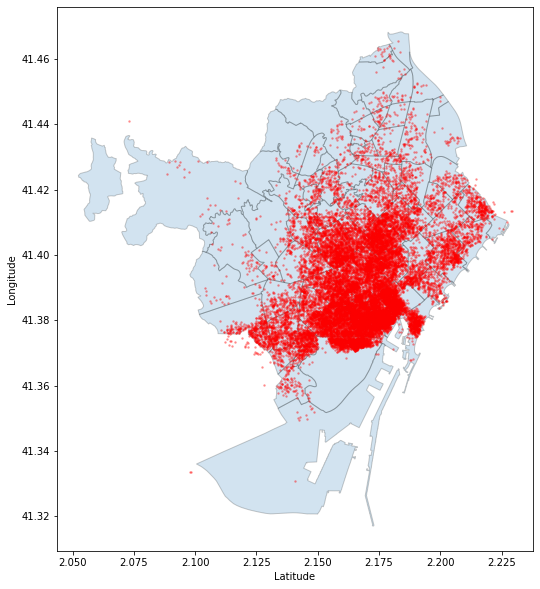

In [28]:
# Limitacions dels barris
barris.plot(figsize=(10, 10), alpha=0.2, edgecolor='black')

# Localització dels lloguers
plt.scatter(df['longitude'], df['latitude'], marker = 'o', color = 'red', s = 2.5, alpha = 0.3)

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

Tot i que ens dóna la informació que volem, la visualització la podem millorar.

I si afegim el mapa de Barcelona?

In [29]:
# Canvi del sistema de referència de coordenades perquè marxin els polígons dels dos mapes
barris = barris.to_crs(epsg=3857)

# Llegir el fitxer geojson que conté els districtes
dists = gpd.read_file("data/districtes.geojson")

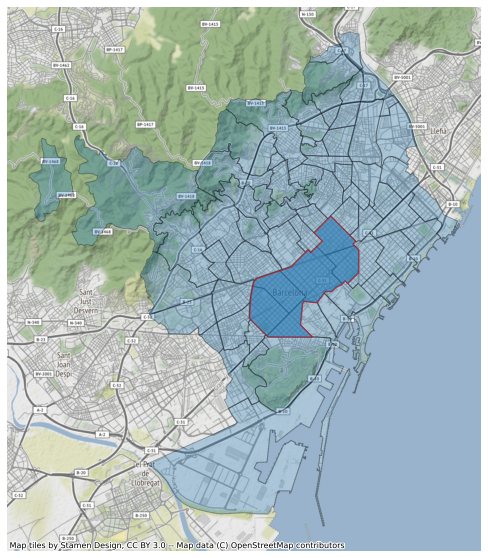

In [30]:
#Plot del mapa
axe = barris.plot(figsize=(10,10), alpha=0.3, edgecolor='black')
ctx.add_basemap(axe)

# Només per experimentar una mica, pintem un districte de color vermell.
dists1 = dists[dists['NOM']=='Eixample']
dists1 = dists1.to_crs(epsg=3857)

# Utilitzar els barris com a eix d’aquest mapa
dists1.plot(ax=axe, figsize=(10,10), alpha=0.6, edgecolor='r')

plt.axis('off')
plt.show()

## Let's code!

Per aprofitar aquesta visualització, calcularem els següents punts considerant només aquells lloguers que són "Entire home/apt".

1. Nombre total d'apartaments per barri
2. Densitat d'apartaments per barri
3. Preu mitjà dels apartaments de cada barri

In [31]:
# Filtrem el dataframe i ens quedem amb les files dels apartaments sencers
df_entire = df[df['room_type']=="Entire home/apt"]

In [32]:
# Comptem quants pisos hi ha per barri
df_entire_agg = df_entire.id.groupby(df_entire['neighbourhood']).count().reset_index()
df_entire_agg.columns = ['barri', 'quantitat']

df_entire_agg.head()

barri  quantitat
0                                 Baró de Viver          1
1                                      Can Baró         27
2                                     Canyelles          1
3  Diagonal Mar i el Front Marítim del Poblenou        114
4                                         Horta          6

In [33]:
# Àrea dels diferents barris
area = barris[['NOM', 'AREA']].sort_values(by='NOM')
area.head()

NOM        AREA
71     Baró de Viver  229892.748
20          Can Baró  384183.684
60       Can Peguera  118684.902
64         Canyelles  790101.386
68  Ciutat Meridiana  376683.246

In [34]:
area['AREA'].sum()

101696391.706

In [35]:
df_entire_merge = pd.merge(left = area, right = df_entire_agg, left_on='NOM', right_on='barri')[['barri', 'quantitat', 'AREA']]
df_entire_merge.head()

barri  quantitat         AREA
0                                 Baró de Viver          1   229892.748
1                                      Can Baró         27   384183.684
2                                     Canyelles          1   790101.386
3  Diagonal Mar i el Front Marítim del Poblenou        114  1226952.565
4                                         Horta          6  3070018.014

In [36]:
# Densitat d'apartaments
df_entire_merge['densitat'] = df_entire_merge['quantitat'] / df_entire_merge['AREA']

In [37]:
# Creem el dataframe que utilitzarem per crear la visualització
neighbourhood = barris.copy()
neighbourhood = pd.merge(neighbourhood, df_entire_merge, left_on= 'NOM', right_on='barri')
neighbourhood.shape

(69, 51)

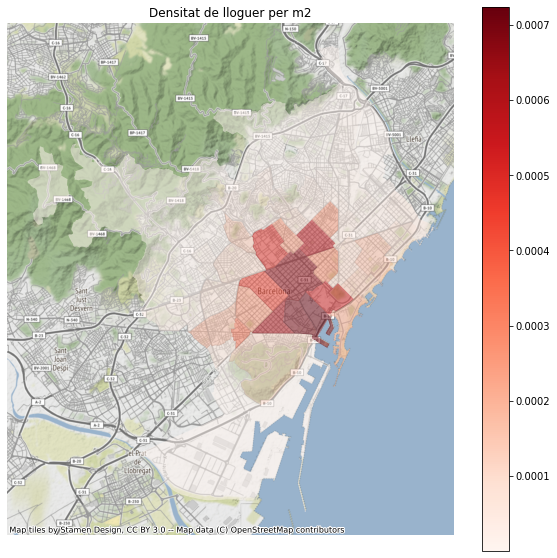

In [38]:
# Visualització densitat
axe = neighbourhood.plot(figsize=(10, 10), alpha=0.5, column='densitat', cmap='Reds', vmin=neighbourhood.densitat.min(), vmax=neighbourhood.densitat.max(), legend = True)
ctx.add_basemap(axe)
plt.title('Densitat de lloguer per m2')
plt.axis('off')
plt.show()

In [39]:
# Preu mig dels lloguers
df_preu_agg = df_entire.groupby('neighbourhood')['price'].mean().reset_index()
df_preu_agg.columns = ['barri', 'preu']

In [40]:
df_preu_agg.head()

barri        preu
0                                 Baró de Viver   25.000000
1                                      Can Baró  103.777778
2                                     Canyelles   76.000000
3  Diagonal Mar i el Front Marítim del Poblenou  265.640351
4                                         Horta   86.000000

In [41]:
neighbourhood = pd.merge(neighbourhood, df_preu_agg, left_on= 'NOM', right_on='barri')

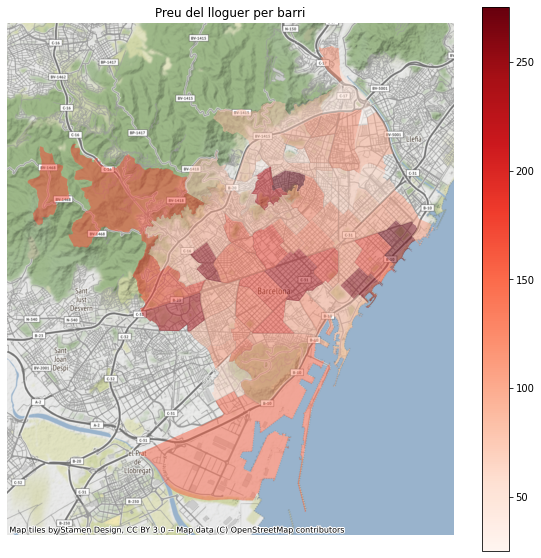

In [42]:
# Visualització preu lloguer
axe = neighbourhood.plot(figsize=(10, 10), alpha=0.5, column='preu', cmap='Reds', vmin=neighbourhood.preu.min(), vmax=neighbourhood.preu.max(), legend = True)
ctx.add_basemap(axe)
plt.title('Preu del lloguer per barri')
plt.axis('off')
plt.show()

Per aquells que us va agradar pensar noves solucions pel vostre problema, us proposo que doneu un cop d'ull al següent Kaggle!

https://www.kaggle.com/kritikseth/us-airbnb-open-data/tasks?taskId=2542&campaign=804ac1b0-8545-4bd6-a1ab-8bb2f0262f71